#### Cluster audio genres using Spotify Data

## Objective: Group similar tracks into clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\dataset.csv")
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
pd.get_option("display.max_columns")

20

In [4]:
df=pd.DataFrame(dataset)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.shape

(114000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df["track_genre"].nunique()

114

In [10]:
df.sample()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36403,36403,5pK2Elt8xOENwe8xAGfASw,NTO;Monolink,Apnea,Beyond Control,51,332146,False,0.669,0.619,...,-9.02,0,0.0376,0.00122,0.817,0.0677,0.432,124.994,4,french


In [11]:
print(df["track_id"].nunique())
print(df["artists"].nunique())
print(df["album_name"].nunique())
print(df["track_name"].nunique())
print(df["track_genre"].nunique())

89740
31437
46589
73608
114


In [12]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [13]:
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'],axis=1,inplace=True)

In [14]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [15]:
mapp={False:0,True:1}
df["explicit"]=df["explicit"].map(mapp)

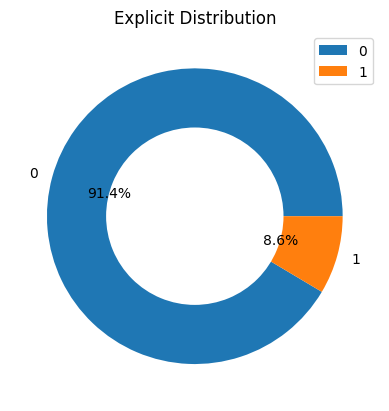

In [16]:
explicit=df["explicit"].value_counts().reset_index()
plt.pie(x=explicit["count"],labels=explicit["explicit"],autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.title("Explicit Distribution")
plt.legend(loc=1)
plt.show()

In [17]:
df.sample()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8871,33,236586,0,0.272,0.343,10,-6.765,0,0.0293,0.212,0.000005,0.0933,0.158,199.642,3,blues


#### Distribution of all Numerical values

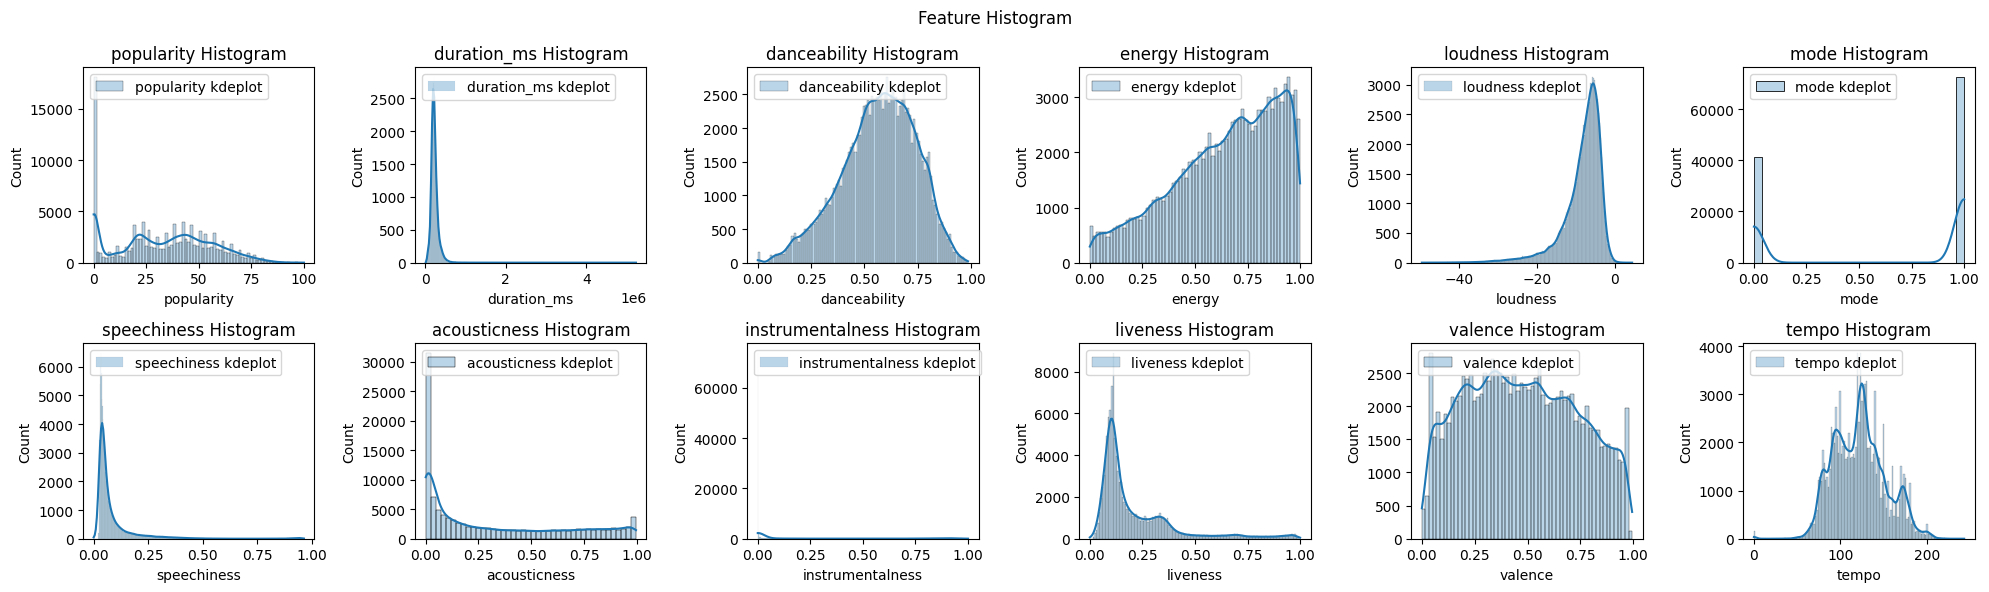

In [18]:

col=['popularity', 'duration_ms','danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(2,6,figsize=(20,6))
for index,feature in enumerate(col):
       row=index//6
       col=index%6
       sns.histplot(df[feature],ax=ax[row,col],kde=True,alpha=0.3,label="{} kdeplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()

       

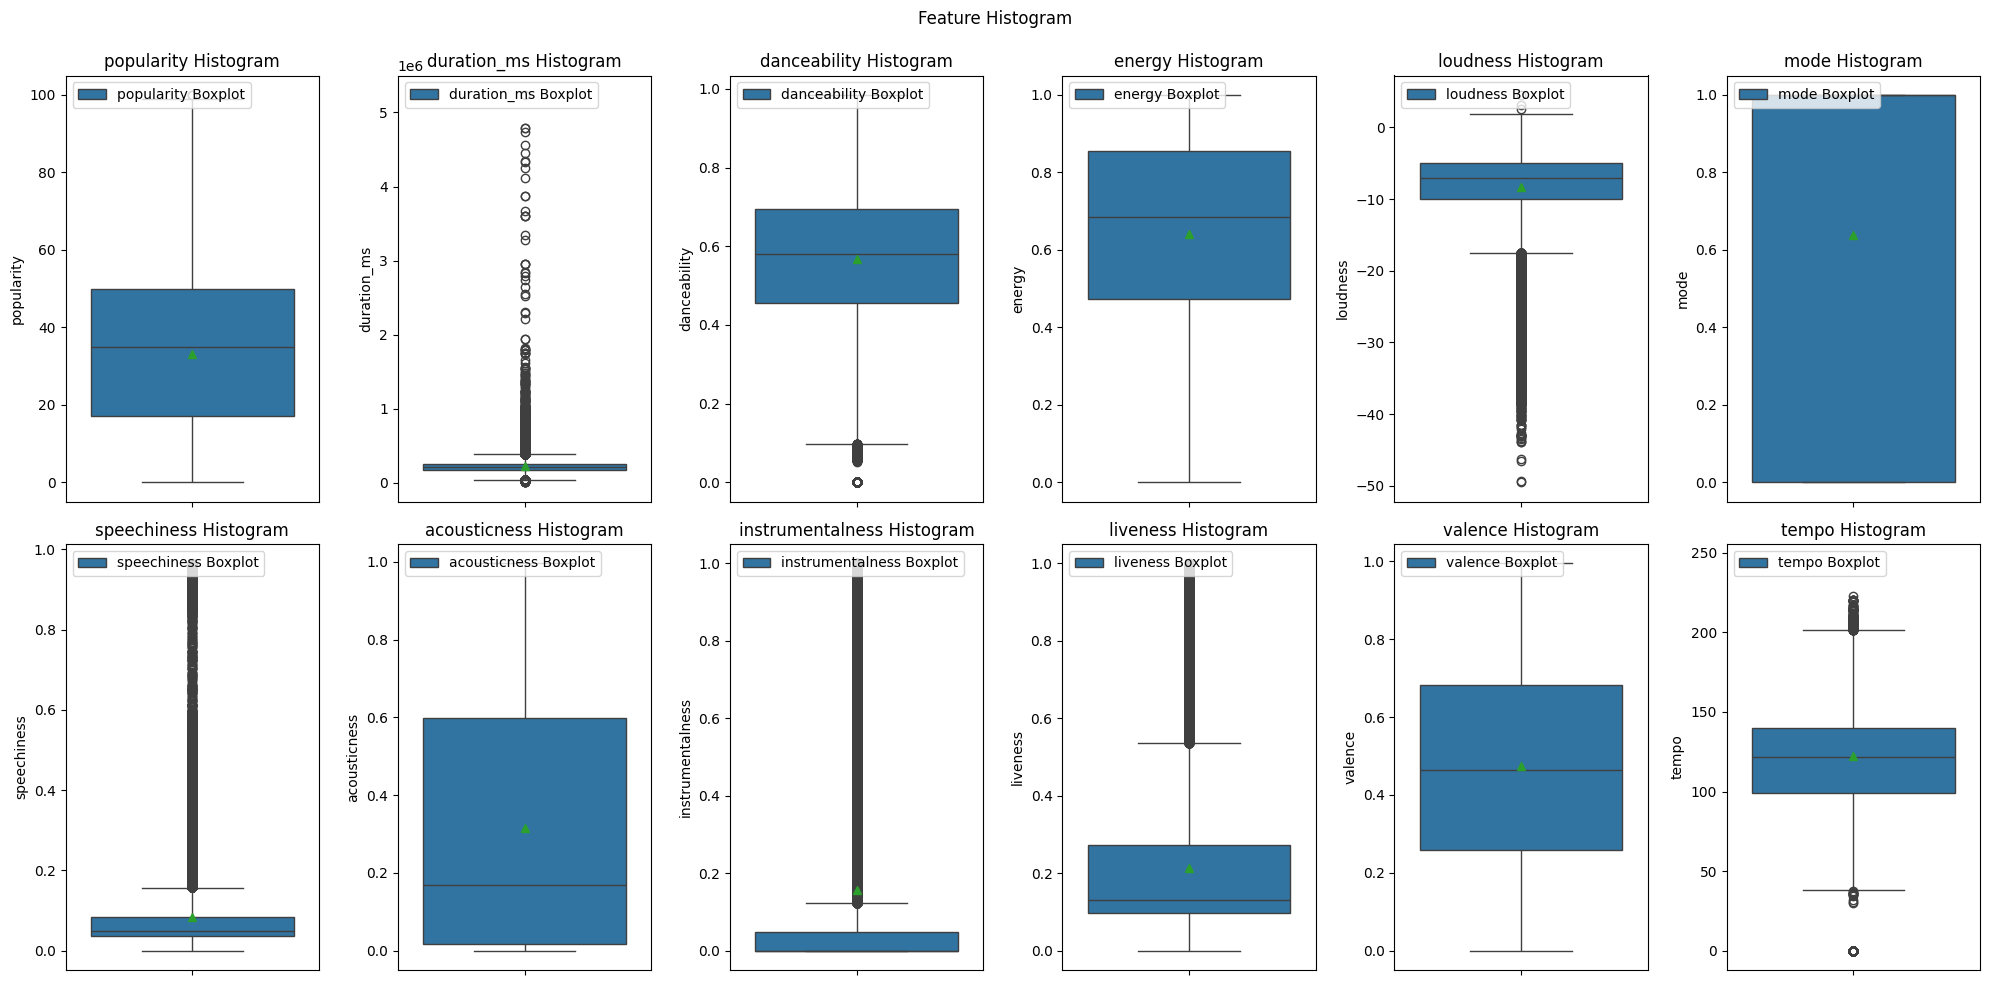

In [19]:
col=['popularity', 'duration_ms','danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(2,6,figsize=(20,10))
for index,feature in enumerate(col):
       row=index//6
       col=index%6
       sns.boxplot(df[feature],ax=ax[row,col],showmeans=True,label="{} Boxplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()

#### Distribution of explicit with danceability,energy and loudness

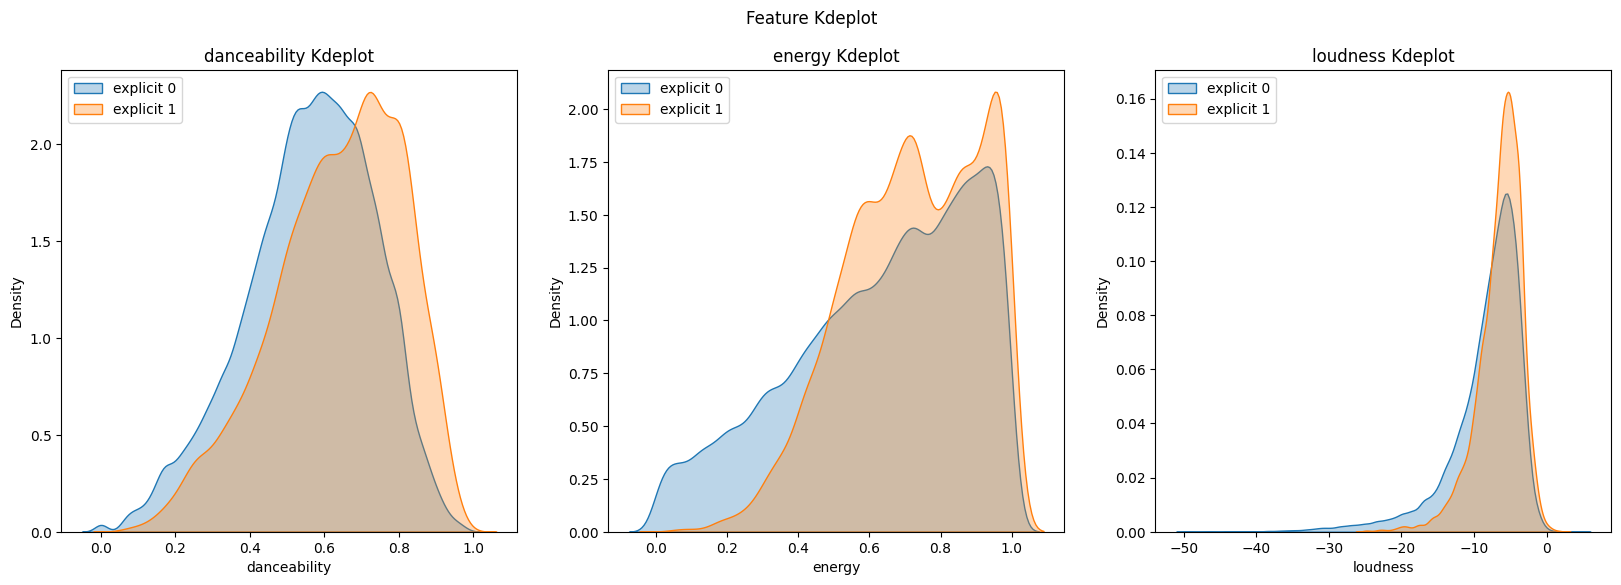

In [20]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
col1=["danceability",	"energy",	"loudness"	]
for index,feature in enumerate(col1):
    col=index%3
    sns.kdeplot(df[df["explicit"]==0][feature],fill=True,alpha=0.3,ax=ax[col],label="explicit 0")
    sns.kdeplot(df[df["explicit"]==1][feature],alpha=0.3,fill=True,ax=ax[col],label="explicit 1")
    ax[col].set_title("{} Kdeplot".format(feature))
    ax[col].legend()
plt.suptitle("Feature Kdeplot")
plt.show()

#### Relation between explicit and popularity

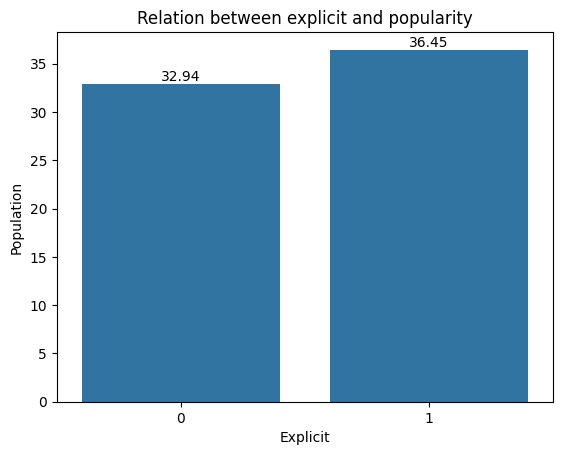

In [21]:
popularity=df.groupby("explicit")["popularity"].mean().reset_index()
bar=sns.barplot(x="explicit",y="popularity",data=popularity)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.xlabel("Explicit")
plt.ylabel("Population")
plt.title("Relation between explicit and popularity")
plt.show()

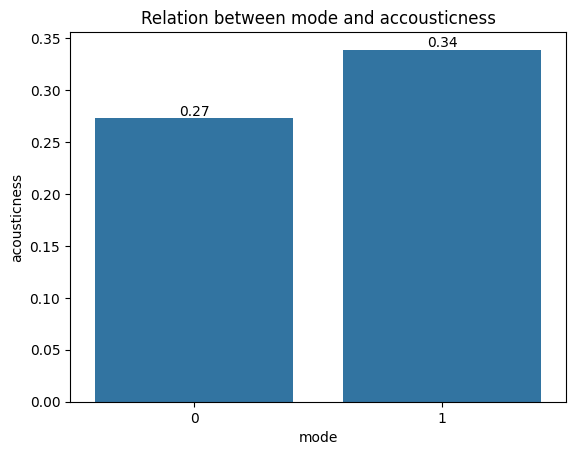

In [22]:
mode=df.groupby("mode")["acousticness"].mean().reset_index()
bar=sns.barplot(x="mode",y="acousticness",data=mode)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.xlabel("mode")
plt.ylabel("acousticness")
plt.title("Relation between mode and accousticness")
plt.show()

In [23]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


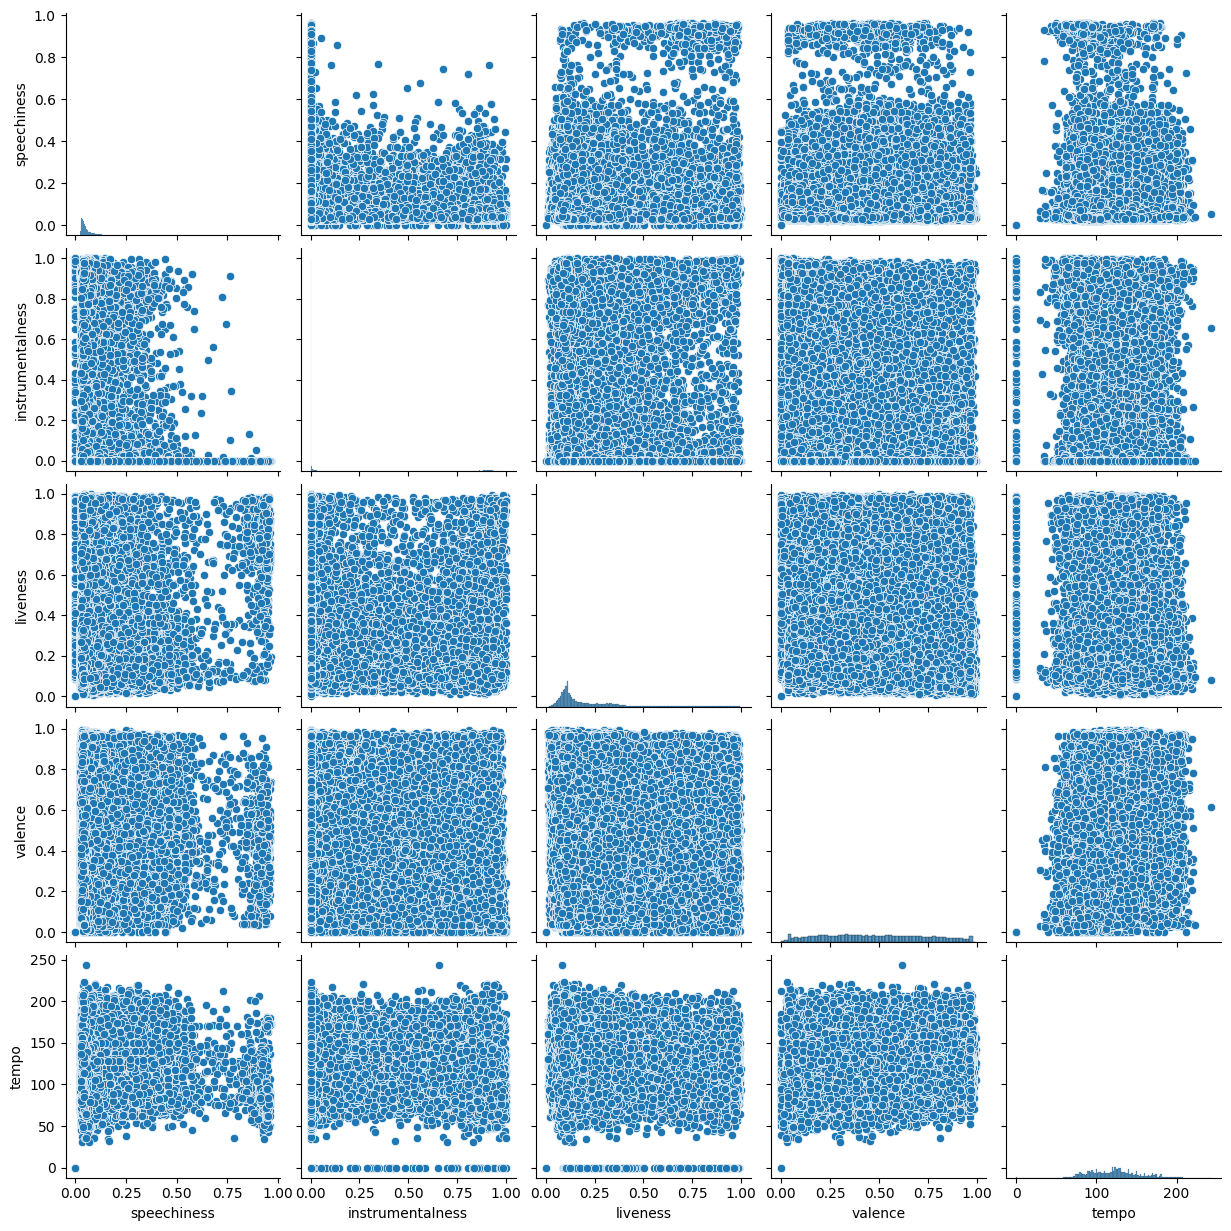

In [24]:
sns.pairplot(data=df,vars=["speechiness","instrumentalness","liveness","valence","tempo"],kind="scatter")
plt.show()

In [25]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [26]:
col=['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
dff=df[col]

In [27]:
dff.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


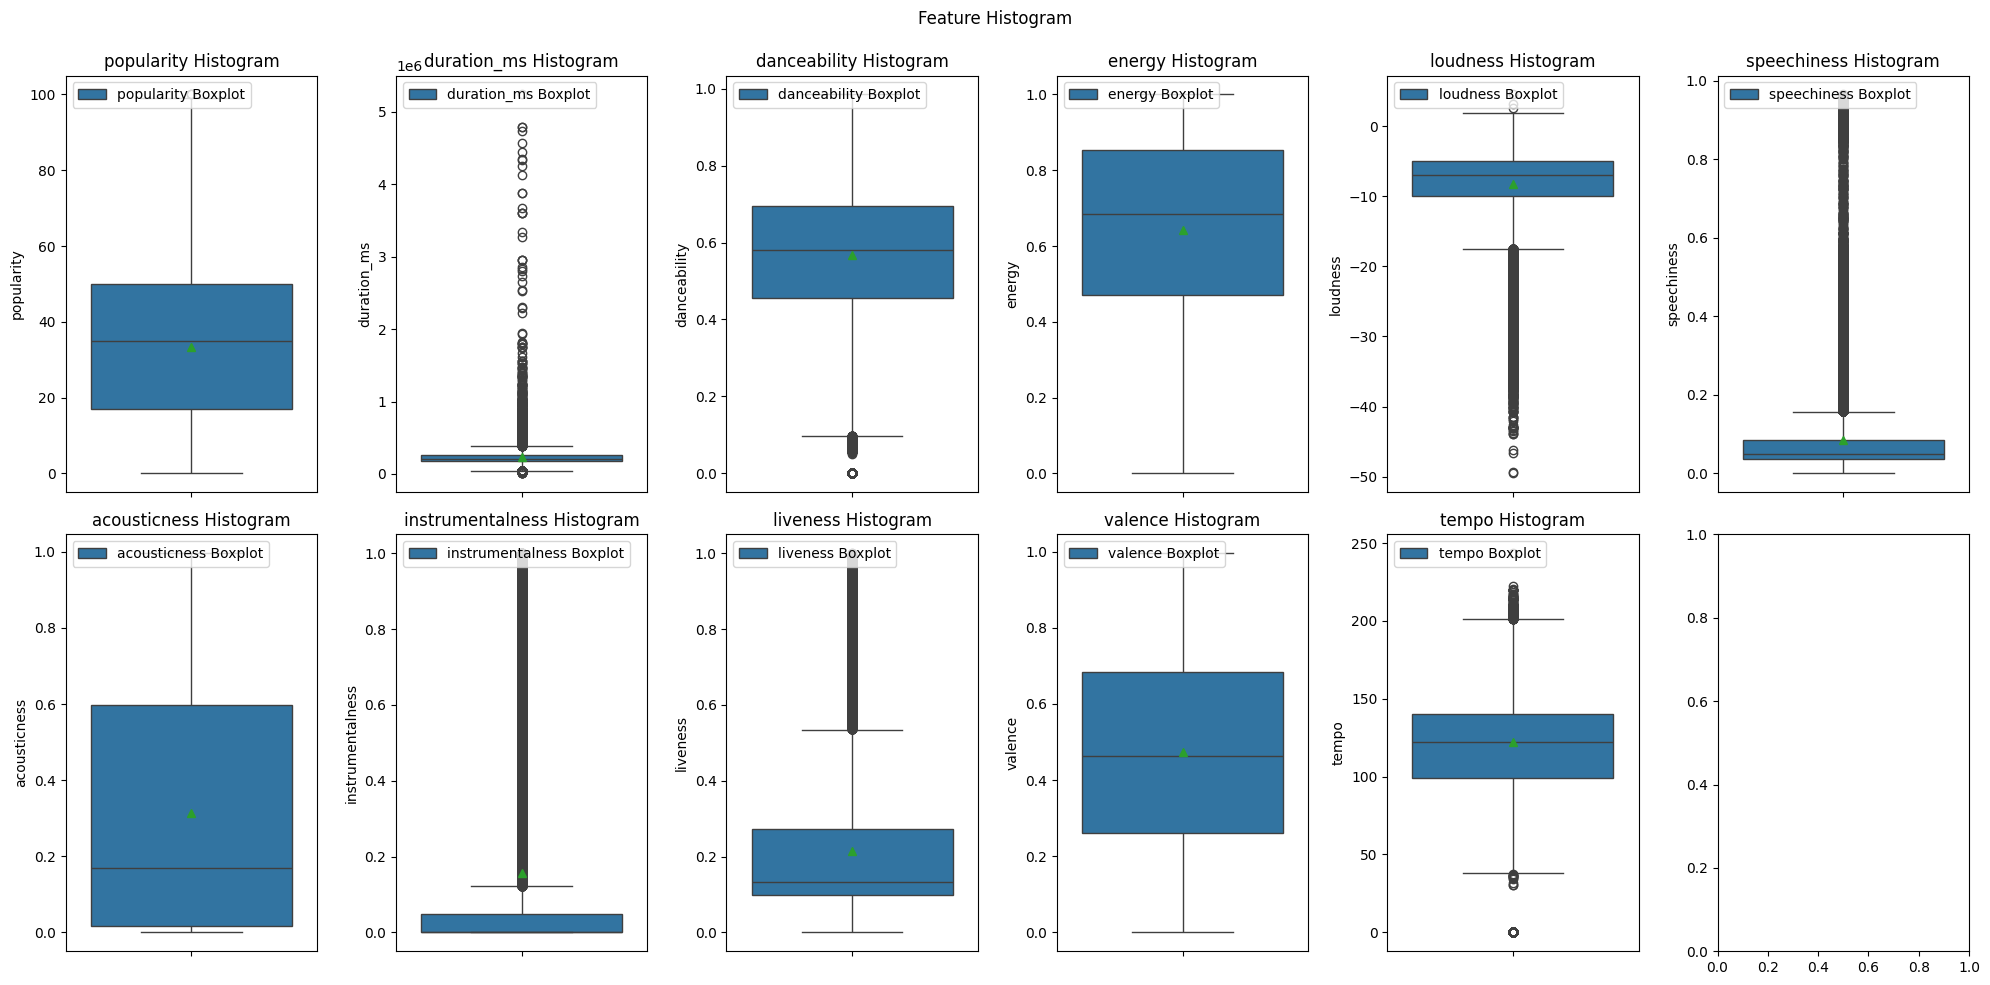

In [28]:
col=['popularity', 'duration_ms','danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(2,6,figsize=(20,10))
for index,feature in enumerate(col):
       row=index//6
       col=index%6
       sns.boxplot(df[feature],ax=ax[row,col],showmeans=True,label="{} Boxplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()

In [29]:
def cap_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    min_value=Q1-1.5*IQR
    max_value=Q3+1.5*IQR
    return series.apply(lambda x:min_value if x<min_value else (max_value if x>max_value else x))

col=['popularity', 'duration_ms','danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
for i in col:
    dff[i]=cap_outliers(dff[i])


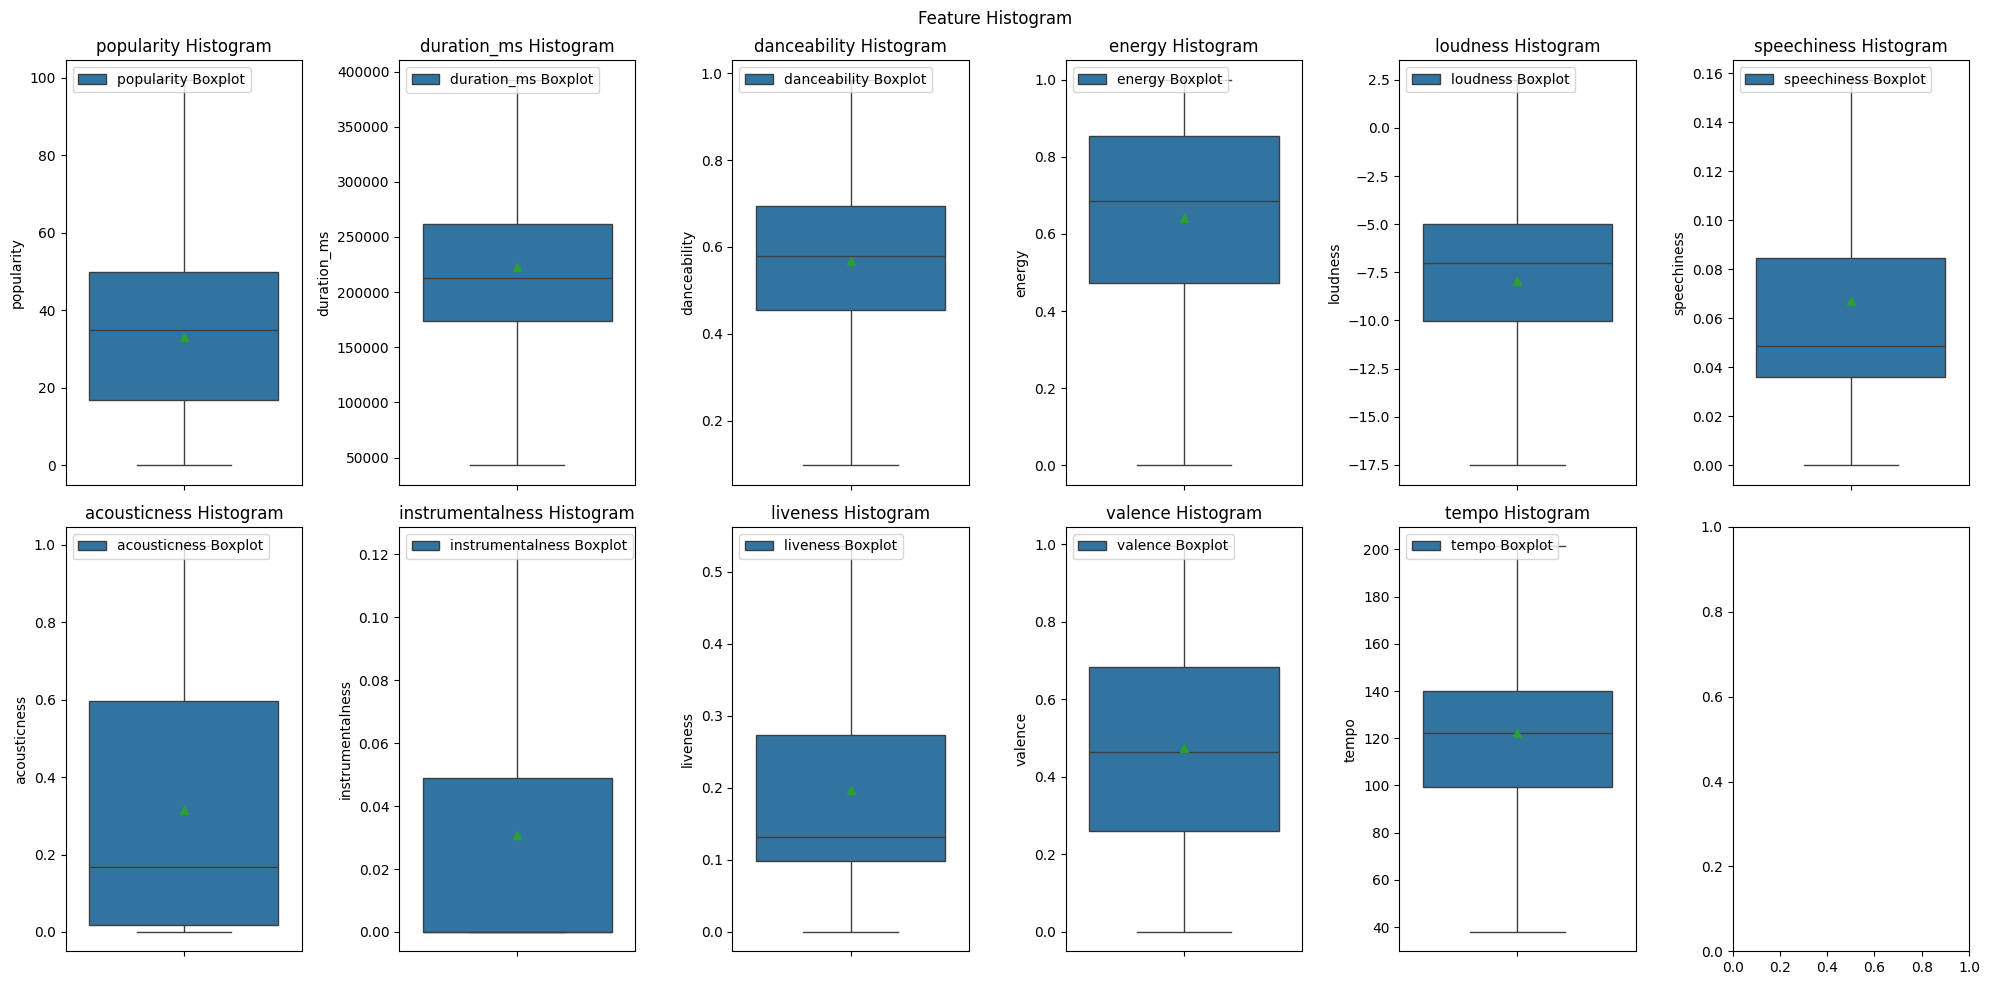

In [30]:
col=['popularity', 'duration_ms','danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(2,6,figsize=(20,10))
for index,feature in enumerate(col):
       row=index//6
       col=index%6
       sns.boxplot(dff[feature],ax=ax[row,col],showmeans=True,label="{} Boxplot".format(feature))
       ax[row,col].set_title("{} Histogram".format(feature))
       ax[row,col].legend(loc="upper left")
plt.suptitle("Feature Histogram")
plt.tight_layout()
plt.show()

In [31]:
! pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import gensim.downloader as api

In [33]:
glove_model=api.load("glove-wiki-gigaword-300")

In [34]:
glove_model.most_similar("acoustic",topn=5)

[('guitar', 0.6608458757400513),
 ('guitars', 0.6346383690834045),
 ('instrumentation', 0.6038997173309326),
 ('vocals', 0.5810157656669617),
 ('percussion', 0.5294560194015503)]

In [35]:
unique_genre=df["track_genre"].unique()
unique_genre

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [36]:
df["track_genre"]=df["track_genre"].replace("black-metal","metal")
df["track_genre"]=df["track_genre"].replace('chicago-house',"house")
df["track_genre"]=df["track_genre"].replace('death-metal',"metal")
df["track_genre"]=df["track_genre"].replace('deep-house',"house")
df["track_genre"]=df["track_genre"].replace('detroit-techno',"techno")
df["track_genre"]=df["track_genre"].replace('drum-and-bass',"drum")
df["track_genre"]=df["track_genre"].replace('j-dance',"dance")
df["track_genre"]=df["track_genre"].replace('j-idol',"idol")
df["track_genre"]=df["track_genre"].replace('j-rock',"rock") #'minimal-techno'
df["track_genre"]=df["track_genre"].replace('minimal-techno',"techno")
df["track_genre"]=df["track_genre"].replace('pop-film',"pop")
df["track_genre"]=df["track_genre"].replace('progressive-house',"house") #psych-rock
df["track_genre"]=df["track_genre"].replace("psych-rock","rock")
df["track_genre"]=df["track_genre"].replace("r-n-b","rnb")
df["track_genre"]=df["track_genre"].replace("show-tunes","tunes")
df["track_genre"]=df["track_genre"].replace("world-music","music")

In [37]:
new_unique=df["track_genre"].unique()

In [38]:
vector=[glove_model[word] for word in new_unique]

In [39]:
vector_df=pd.DataFrame(dict(zip(new_unique,vector)))
vector_df.head()

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,metal,bluegrass,blues,brazil,...,soul,spanish,study,swedish,synth-pop,tango,trance,trip-hop,turkish,music
0,0.053505,0.16338,0.153710,-0.19658,0.088063,-0.454940,0.03930,-0.10072,0.01396,0.224030,...,0.37139,0.18857,-0.183190,0.10709,0.084158,0.609200,-0.031449,-0.250340,0.49777,-0.38081
1,0.412540,-0.61372,0.104600,-0.19884,0.360240,0.093253,0.10658,0.25664,0.11887,0.661010,...,-0.49731,0.11805,0.202850,-0.11971,0.007587,-0.055350,-0.017937,0.169760,0.28584,-0.24764
2,-0.293170,-0.40705,-0.086672,0.28283,0.000777,-0.104090,-0.47500,-0.24973,-0.48963,-0.687640,...,-0.14550,-0.24046,0.156140,-0.23660,-0.196070,0.061953,-0.432580,0.044528,0.69037,-0.24949
3,0.274880,0.80922,0.587830,0.26342,0.168340,-1.065800,-0.53350,0.76993,0.45497,-0.027683,...,0.27682,0.10510,0.384920,0.12350,0.149140,-0.280940,0.248430,0.520330,0.38298,0.10468
4,-0.114560,-0.35084,-0.245640,0.42873,-0.614320,-0.692490,0.38095,-0.36124,-0.37177,0.123850,...,0.13691,-0.15965,-0.008493,0.39795,-0.149440,-0.498190,0.470440,-0.433940,0.23411,-0.56411


In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
new_vector=pca.fit_transform(vector)

In [41]:
pca_df=pd.DataFrame(new_vector,columns=["PCA1","PCA2"],index=new_unique)
pca_df

,PCA1,PCA2
acoustic,0.092278,2.559679
afrobeat,2.421710,-0.413876
alt-rock,2.830370,-1.823442
alternative,-1.660561,-0.167993
ambient,1.030486,1.068811
...,...,...
tango,-0.103618,0.573474
trance,0.951274,0.749286
trip-hop,2.961253,-1.488839
turkish,-3.279330,-3.302362


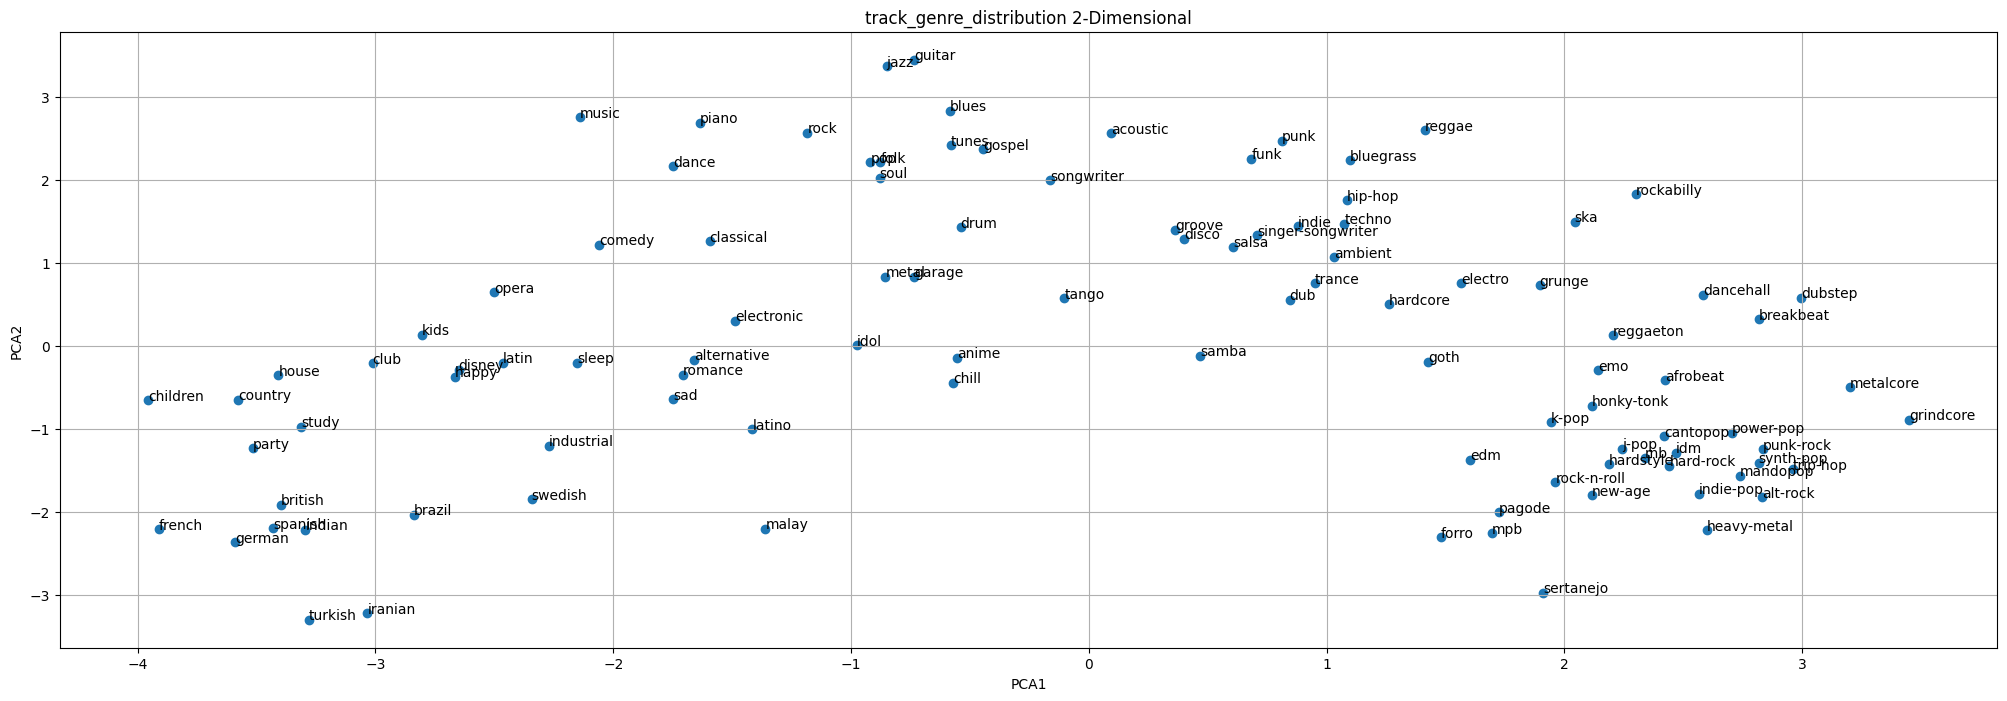

In [42]:
plt.figure(figsize=(25,8))
plt.scatter(x="PCA1",y="PCA2",data=pca_df)
for index,feature in enumerate(new_unique):
    plt.annotate(feature,xy=(new_vector[index,0],new_vector[index,1]))
plt.grid(True)
plt.title("track_genre_distribution 2-Dimensional")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

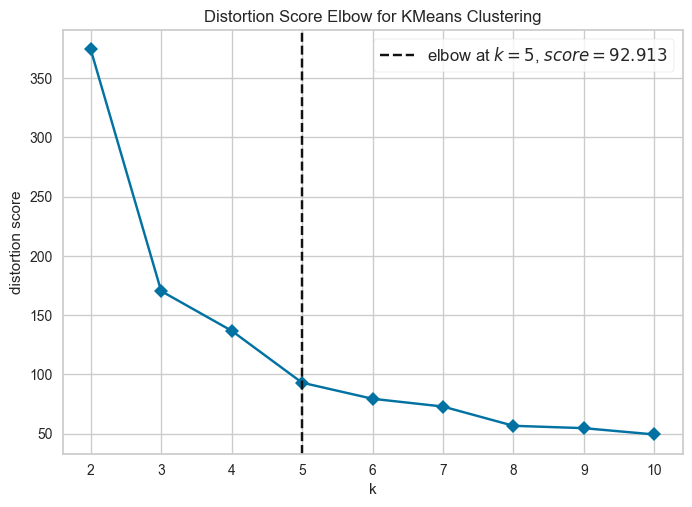

In [43]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer=KElbowVisualizer(KMeans(random_state=42),k=(2,11),timings=False)
visualizer.fit(pca_df)
visualizer.show()
plt.show()

In [44]:
from sklearn.cluster import KMeans
mean=KMeans(n_clusters=5,random_state=42)
mean.fit_predict(pca_df)

array([0, 1, 1, 3, 4, 3, 0, 4, 0, 2, 1, 2, 1, 3, 2, 3, 0, 3, 3, 2, 0, 4,
       4, 4, 3, 0, 4, 1, 1, 4, 3, 1, 0, 1, 2, 4, 0, 2, 0, 1, 1, 4, 4, 0,
       3, 1, 4, 1, 1, 4, 1, 1, 2, 1, 4, 3, 2, 3, 1, 0, 0, 1, 3, 3, 3, 2,
       1, 1, 1, 1, 3, 1, 2, 0, 0, 1, 1, 4, 1, 4, 1, 1, 4, 3, 3, 4, 4, 1,
       0, 4, 4, 3, 0, 0, 2, 2, 2, 1, 4, 4, 1, 2, 0])

In [45]:
pca_df["cluster"]=mean.fit_predict(pca_df)

In [46]:
pca_df.reset_index()

,index,PCA1,PCA2,cluster
0,acoustic,0.092278,2.559679,0
1,afrobeat,2.421710,-0.413876,1
2,alt-rock,2.830370,-1.823442,1
3,alternative,-1.660561,-0.167993,3
4,ambient,1.030486,1.068811,4
...,...,...,...,...
98,tango,-0.103618,0.573474,4
99,trance,0.951274,0.749286,4
100,trip-hop,2.961253,-1.488839,1
101,turkish,-3.279330,-3.302362,2


In [47]:
pca_df.columns

Index(['PCA1', 'PCA2', 'cluster'], dtype='object')

In [48]:
for i in range(5):
    genre=pca_df[pca_df["cluster"]==i].index.tolist()
    print(f"{i}")
    print(genre)
    print("--")

0
['acoustic', 'metal', 'blues', 'classical', 'dance', 'drum', 'folk', 'garage', 'gospel', 'guitar', 'rock', 'jazz', 'piano', 'pop', 'tunes', 'songwriter', 'soul', 'music']
--
1
['afrobeat', 'alt-rock', 'breakbeat', 'cantopop', 'dubstep', 'edm', 'emo', 'forro', 'goth', 'grindcore', 'hard-rock', 'hardstyle', 'heavy-metal', 'honky-tonk', 'idm', 'indie-pop', 'j-pop', 'k-pop', 'mandopop', 'metalcore', 'mpb', 'new-age', 'pagode', 'power-pop', 'punk-rock', 'rnb', 'reggaeton', 'rock-n-roll', 'sertanejo', 'synth-pop', 'trip-hop']
--
2
['brazil', 'british', 'children', 'country', 'french', 'german', 'indian', 'iranian', 'malay', 'party', 'spanish', 'study', 'swedish', 'turkish']
--
3
['alternative', 'anime', 'house', 'chill', 'club', 'comedy', 'disney', 'electronic', 'happy', 'industrial', 'idol', 'kids', 'latin', 'latino', 'opera', 'romance', 'sad', 'sleep']
--
4
['ambient', 'bluegrass', 'dancehall', 'techno', 'disco', 'dub', 'electro', 'funk', 'groove', 'grunge', 'hardcore', 'hip-hop', 'indie

In [49]:

mapp = {
    'acoustic': 0, 'metal': 0, 'blues': 0, 'classical': 0, 'dance': 0, 'drum': 0,
    'folk': 0, 'garage': 0, 'gospel': 0, 'guitar': 0, 'rock': 0, 'jazz': 0, 
    'piano': 0, 'pop': 0, 'tunes': 0, 'songwriter': 0, 'soul': 0, 'music': 0,
    
    'afrobeat': 1, 'alt-rock': 1, 'breakbeat': 1, 'cantopop': 1, 'dubstep': 1, 'edm': 1,
    'emo': 1, 'forro': 1, 'goth': 1, 'grindcore': 1, 'hard-rock': 1, 'hardstyle': 1,
    'heavy-metal': 1, 'honky-tonk': 1, 'idm': 1, 'indie-pop': 1, 'j-pop': 1, 'k-pop': 1,
    'mandopop': 1, 'metalcore': 1, 'mpb': 1, 'new-age': 1, 'pagode': 1, 'power-pop': 1,
    'punk-rock': 1, 'rnb': 1, 'reggaeton': 1, 'rock-n-roll': 1, 'sertanejo': 1,
    'synth-pop': 1, 'trip-hop': 1,

    'brazil': 2, 'british': 2, 'children': 2, 'country': 2, 'french': 2, 'german': 2,
    'indian': 2, 'iranian': 2, 'malay': 2, 'party': 2, 'spanish': 2, 'study': 2,
    'swedish': 2, 'turkish': 2,

    'alternative': 3, 'anime': 3, 'house': 3, 'chill': 3, 'club': 3, 'comedy': 3,
    'disney': 3, 'electronic': 3, 'happy': 3, 'industrial': 3, 'idol': 3, 'kids': 3,
    'latin': 3, 'latino': 3, 'opera': 3, 'romance': 3, 'sad': 3, 'sleep': 3,

    'ambient': 4, 'bluegrass': 4, 'dancehall': 4, 'techno': 4, 'disco': 4, 'dub': 4,
    'electro': 4, 'funk': 4, 'groove': 4, 'grunge': 4, 'hardcore': 4, 'hip-hop': 4,
    'indie': 4, 'punk': 4, 'reggae': 4, 'rockabilly': 4, 'salsa': 4, 'samba': 4,'singer-songwriter': 4, 'ska': 4, 'tango': 4, 'trance': 4}
df["track_genre"]=df["track_genre"].map(mapp)

In [50]:
dff["track_genre"]=df["track_genre"]

In [51]:
dff.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73.0,230666.0,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,55.0,149610.0,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,57.0,210826.0,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,71.0,201933.0,0,0.266,0.0596,0,-17.528,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,82.0,198853.0,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


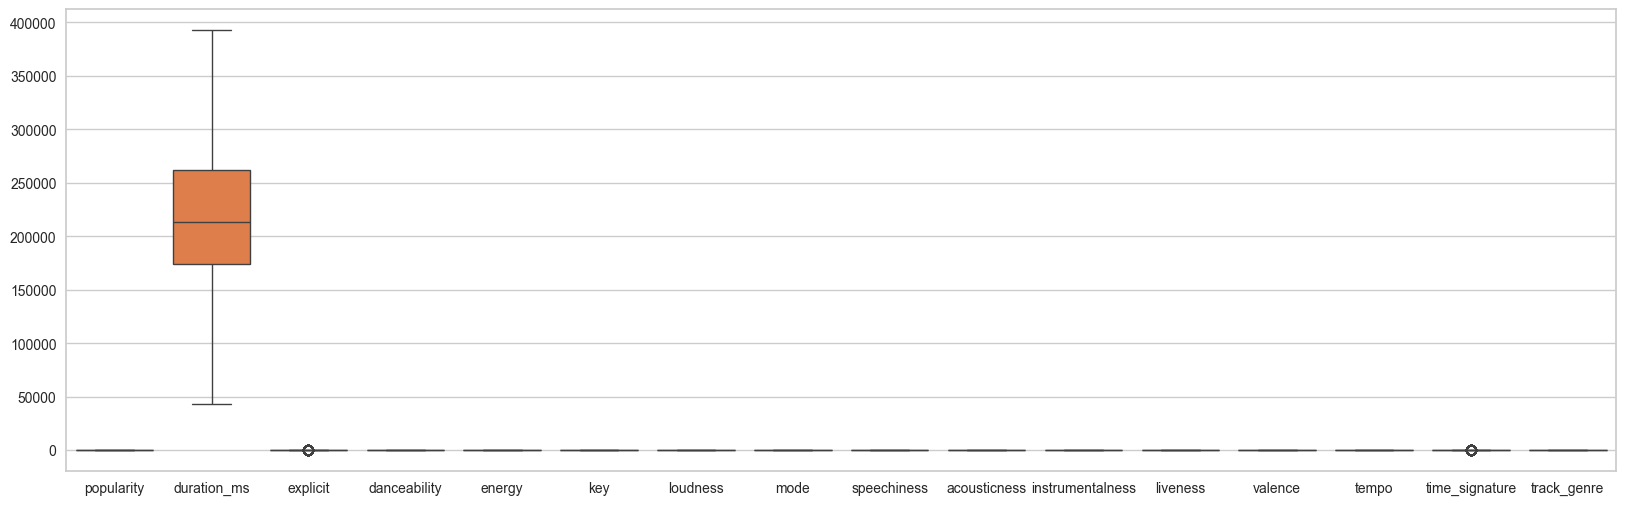

In [52]:
plt.figure(figsize=(20,6))
sns.boxplot(data=dff)
plt.show()

In [53]:
dff.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238818,222505.179151,0.085501,0.567016,0.641383,5.309126,-7.942236,0.637558,0.067183,0.314907,0.030945,0.196586,0.474066,122.181902,3.904034,1.912289
std,22.304933,73135.840733,0.279627,0.172916,0.251530,3.559999,4.012151,0.480708,0.042496,0.332522,0.051007,0.140734,0.259261,29.745179,0.432623,1.460372
min,0.000000,42906.000000,0.000000,0.097500,0.000000,0.000000,-17.528000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.939750,0.000000,0.000000
25%,17.000000,174066.000000,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,1.000000
50%,35.000000,212906.000000,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,2.000000
75%,50.000000,261506.000000,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,3.000000
max,99.500000,392666.000000,1.000000,0.985000,1.000000,11.000000,2.512000,1.000000,0.157400,0.996000,0.122500,0.535500,0.995000,201.349750,5.000000,4.000000


In [54]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
dff_norm=scalar.fit_transform(dff)

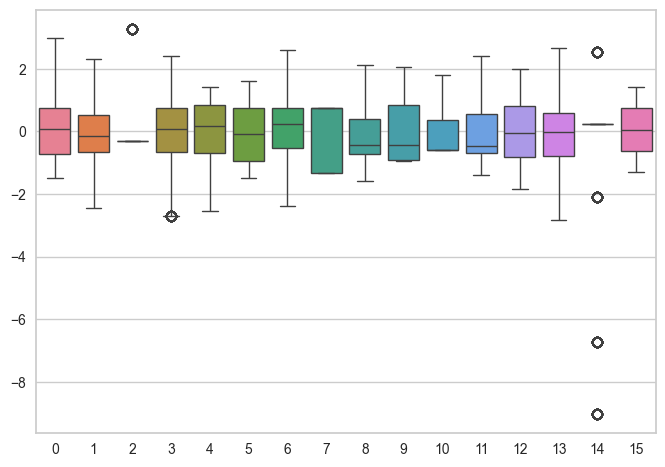

In [55]:
sns.boxplot(data=dff_norm)
plt.show()

In [56]:
dff_norm_df=pd.DataFrame(dff_norm,columns=dff.columns)
dff_norm_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,1.782626,0.111585,-0.305769,0.630276,-0.717147,-1.210434,0.298155,-1.326297,1.784118,-0.850193,-0.606662,1.146951,0.929315,-1.151953,0.221824,-1.309459
1,0.975626,-0.996714,-0.305769,-0.850218,-1.889974,-1.210434,-2.316165,0.753979,0.214541,1.831744,-0.606572,-0.679202,-0.798681,-1.502532,0.221824,-1.309459
2,1.065293,-0.159692,-0.305769,-0.746121,-1.122667,-1.491334,-0.446586,0.753979,-0.270216,-0.315489,-0.606681,-0.565512,-1.365679,-1.541430,0.221824,-1.309459
3,1.692959,-0.281288,-0.305769,-1.740827,-2.312987,-1.491334,-2.389194,0.753979,-0.726735,1.774605,-0.605295,-0.458927,-1.276965,2.002286,-2.089669,-1.309459
4,2.186126,-0.323402,-0.305769,0.294851,-0.788709,-0.929534,-0.433376,0.753979,-0.343165,0.463409,-0.606681,-0.807815,-1.184394,-0.075068,0.221824,-1.309459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,-0.548707,2.221818,-0.305769,-2.284446,-1.615652,-0.086833,-2.106302,0.753979,-0.587896,0.977663,1.794977,-0.783655,-1.697779,0.128193,2.533318,-1.309459
113995,-0.503874,2.221832,-0.305769,-2.272880,-2.084782,-1.491334,-2.389194,-1.326297,-0.637313,2.042258,1.794977,-0.650780,-1.693536,-1.241985,0.221824,-1.309459
113996,-0.503874,0.669453,-0.305769,0.358466,-1.241937,-1.491334,-0.735958,-1.326297,-0.592603,1.660327,-0.606681,-0.800709,1.037314,0.342783,0.221824,-1.309459
113997,0.347960,0.839371,-0.305769,0.115573,-0.538241,0.474967,-0.734463,0.753979,-0.882045,0.198764,-0.606681,0.521654,-0.235539,0.463206,0.221824,-1.309459


In [57]:
dff_norm_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05
mean,1.396166e-17,-9.972617e-17,-3.390690e-17,-3.899293e-16,2.241346e-16,1.844934e-17,3.430580e-16,-6.183023e-17,2.413373e-16,-1.196714e-17,-9.174808e-17,-1.456002e-16,-2.373483e-16,-1.042138e-16,-1.924715e-16,-1.196714e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.490207e+00,-2.455704e+00,-3.057689e-01,-2.715293e+00,-2.549938e+00,-1.491334e+00,-2.389194e+00,-1.326297e+00,-1.580942e+00,-9.470287e-01,-6.066815e-01,-1.396874e+00,-1.828535e+00,-2.832140e+00,-9.024149e+00,-1.309459e+00
25%,-7.280403e-01,-6.623208e-01,-3.057689e-01,-6.420235e-01,-6.734145e-01,-9.295339e-01,-5.161253e-01,-1.326297e+00,-7.361473e-01,-8.962048e-01,-6.066815e-01,-7.005192e-01,-8.256808e-01,-7.720075e-01,2.218242e-01,-6.246989e-01
50%,7.895966e-02,-1.312519e-01,-3.057689e-01,7.509060e-02,1.734064e-01,-8.683341e-02,2.338497e-01,7.539789e-01,-4.302328e-01,-4.387898e-01,-6.058659e-01,-4.589270e-01,-3.882571e-02,-5.543835e-03,2.218242e-01,6.006119e-02
75%,7.514596e-01,5.332678e-01,-3.057689e-01,7.401561e-01,8.452970e-01,7.558671e-01,7.325869e-01,7.539789e-01,4.075023e-01,8.498512e-01,3.539819e-01,5.429705e-01,8.058864e-01,6.014143e-01,2.218242e-01,7.448212e-01
max,2.970709e+00,2.326651e+00,3.270444e+00,2.417278e+00,1.425747e+00,1.598568e+00,2.605655e+00,7.539789e-01,2.122977e+00,2.048272e+00,1.794977e+00,2.408205e+00,2.009312e+00,2.661547e+00,2.533318e+00,1.429581e+00


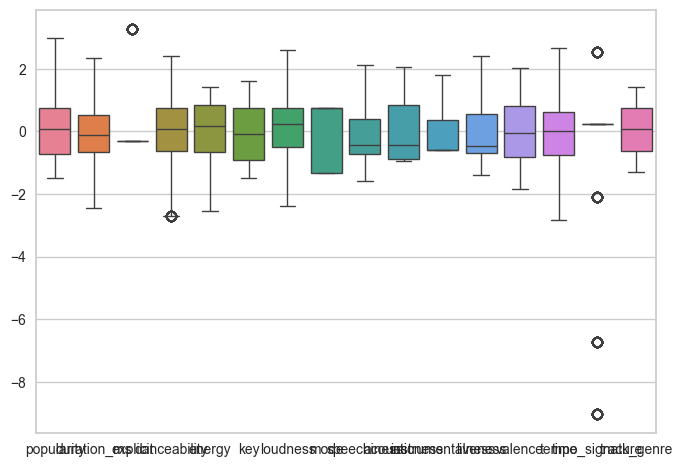

In [58]:
sns.boxplot(data=dff_norm_df)
plt.show()

In [59]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_=pca.fit_transform(dff_norm_df)

In [60]:
pca_df_original=pd.DataFrame(pca_,columns=["PCA1","PCA2"])
pca_df_original

,PCA1,PCA2
0,0.987192,0.752828
1,-3.612108,1.452412
2,-1.635530,-0.165635
3,-4.174977,-0.413754
4,-1.222806,0.330195
...,...,...
113994,-3.507857,-2.430920
113995,-4.940552,-2.005164
113996,-1.441680,1.133663
113997,-0.791023,-0.296919


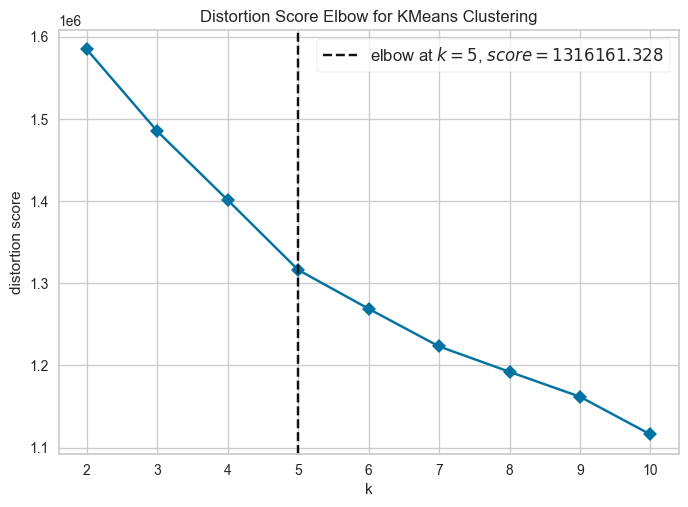

In [61]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visual=KElbowVisualizer(KMeans(random_state=42),k=(2,11),timings=False)
visual.fit(dff_norm_df)
visual.show()
plt.show()

In [62]:
mean1=KMeans(n_clusters=5,random_state=42)
mean1.fit_predict(dff_norm_df)

array([4, 1, 1, ..., 1, 3, 4])

In [63]:
mean1.cluster_centers_

array([[ 0.14399806, -0.27682196,  3.27044398,  0.4071605 ,  0.32695062,
         0.01561253,  0.38240618, -0.1225708 ,  0.95393967, -0.31790944,
        -0.33254773,  0.12047438, -0.00522964, -0.00794986,  0.13380139,
         0.1654252 ],
       [-0.12770977, -0.22846497, -0.29796907, -0.65984944, -1.47361255,
        -0.10288485, -1.35692068,  0.1856575 , -0.46046994,  1.42544431,
         0.40211212, -0.22990375, -0.65265236, -0.42767621, -0.50404017,
        -0.16040616],
       [-0.21023651,  0.64122583, -0.30426148,  0.011981  ,  0.53169621,
         0.05218739,  0.04732451, -0.18287807,  0.01265549, -0.7144575 ,
         1.7173008 , -0.06288392, -0.44800776,  0.21719501,  0.09168352,
         0.19588341],
       [ 0.05157249, -0.05853633, -0.30576888,  0.12504643,  0.31220931,
        -0.07311636,  0.39831501,  0.75397891, -0.06223891, -0.2391553 ,
        -0.54498954,  0.09671534,  0.37646822,  0.11912775,  0.12759294,
        -0.05179865],
       [ 0.12321475, -0.01329158, -0

In [64]:
mean1.labels_

array([4, 1, 1, ..., 1, 3, 4])

In [65]:
from sklearn.metrics import silhouette_score
print(silhouette_score(dff_norm_df,mean1.labels_,metric="manhattan"))

0.1330738801609028


In [66]:
from sklearn.metrics import silhouette_score
print(silhouette_score(dff_norm_df,mean1.labels_,metric="euclidean"))

0.10227905192087591


In [67]:
pca_df_original["kmean_cluster"]=mean1.fit_predict(dff_norm_df)

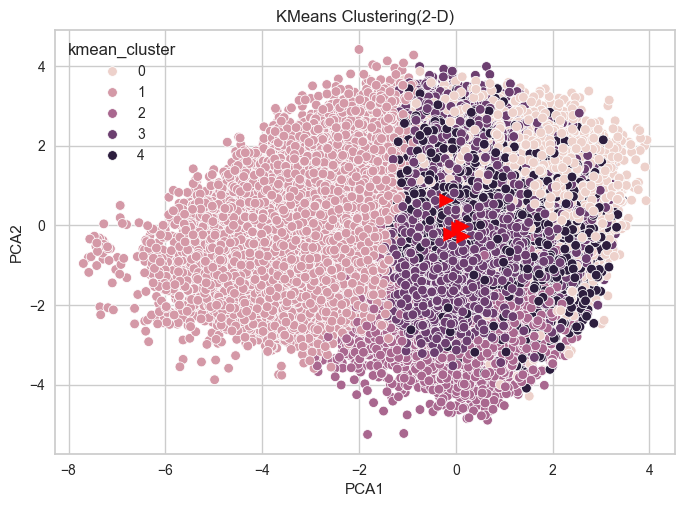

In [68]:
sns.scatterplot(x="PCA1",y="PCA2",hue="kmean_cluster",data=pca_df_original)
plt.scatter(mean1.cluster_centers_[:,0],mean1.cluster_centers_[:,1],marker=">",color="red",s=100,label="centroid")
plt.title("KMeans Clustering(2-D)")
plt.show()

#### Hierararical Clustering-->> Agg;omerative 

In [69]:
from sklearn.cluster import AgglomerativeClustering
dff_small=dff_norm_df.sample(10000,random_state=42)
agg=AgglomerativeClustering(n_clusters=5)
agg.fit_predict(dff_small)

array([0, 3, 4, ..., 0, 0, 0], dtype=int64)

In [70]:
dff_small.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113185,0.751460,2.326651,-0.305769,-1.145160,-0.172478,0.474967,0.238835,0.753979,-0.865573,-0.931661,-0.606681,-0.146278,-1.648793,0.868450,0.221824,-1.309459
42819,-0.997040,-1.757999,-0.305769,-2.290229,1.413820,0.474967,1.085766,0.753979,1.195820,-0.931360,1.794977,1.587502,-1.715136,0.001382,0.221824,-0.624699
59311,-1.490207,-0.122064,-0.305769,-2.278663,0.642537,1.036767,-0.530581,-1.326297,1.807650,0.896465,-0.569235,-0.011271,-1.486408,-1.567249,-2.089669,0.060061
90416,0.034126,-1.036421,-0.305769,-0.856001,-1.031226,1.036767,-1.369786,0.753979,-0.823215,0.015317,-0.606681,-0.643674,-0.046540,-1.277419,0.221824,-0.624699
61000,1.065293,0.188524,-0.305769,-0.069489,1.191182,1.036767,1.158545,-1.326297,-0.449058,0.508519,-0.606681,0.493231,1.307314,-0.998314,0.221824,0.744821


In [71]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_agg=pca.fit_transform(dff_small)

In [72]:
pca_agg_df=pd.DataFrame(pca_agg,columns=["PCA1","PCA2"])
pca_agg_df.head()

,PCA1,PCA2
0,-0.238651,-2.467816
1,0.680612,-2.860515
2,-1.298881,-1.511498
3,-1.827396,0.894229
4,1.359587,0.630553


In [73]:
agg.labels_

array([0, 3, 4, ..., 0, 0, 0], dtype=int64)

In [74]:
print(silhouette_score(dff_small,agg.labels_,metric="manhattan"))

0.11700215474288814


In [75]:
print(silhouette_score(dff_small,agg.labels_,metric="euclidean"))

0.09367821780594461


In [76]:
pca_agg_df["agg_cluster"]=agg.fit_predict(dff_small)

In [77]:
agg_centroid=pca_agg_df.groupby("agg_cluster")[["PCA1","PCA2"]].mean()
agg_centroid

,PCA1,PCA2
agg_cluster,,
0,0.877597,0.266446
1,-3.614880,-0.538565
2,1.361638,0.453994
3,0.290173,-1.435085
4,-1.381021,0.430541


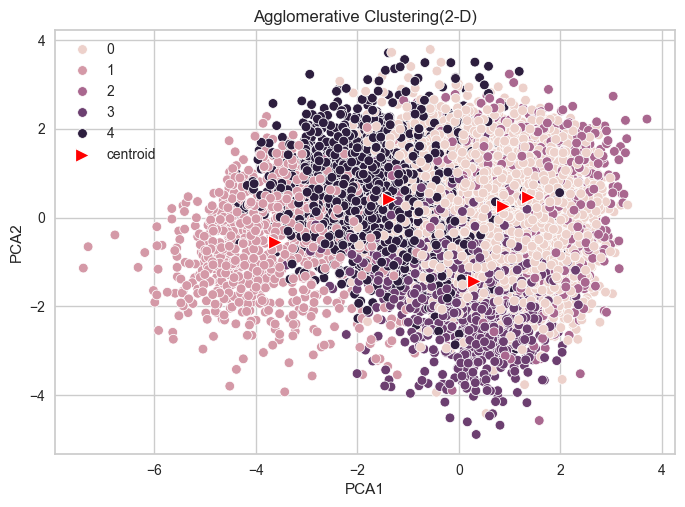

In [78]:
sns.scatterplot(x="PCA1",y="PCA2",hue="agg_cluster",data=pca_agg_df)
sns.scatterplot(x="PCA1",y="PCA2",data=agg_centroid,marker=">",s=100,color="red",label="centroid")
plt.title("Agglomerative Clustering(2-D)")
plt.show()

In [79]:
silhouette_score_df_manhattan=pd.DataFrame({"KMeans":silhouette_score(dff_norm_df,mean1.labels_,metric="manhattan"),
                                            "AgglomerativeClustering":silhouette_score(dff_small,agg.labels_,metric="manhattan")},index=["Manhattan"])
silhouette_score_df_manhattan_df=silhouette_score_df_manhattan.T.reset_index()


In [80]:
silhouette_score_df_manhattan_df

,index,Manhattan
0,KMeans,0.133074
1,AgglomerativeClustering,0.117002


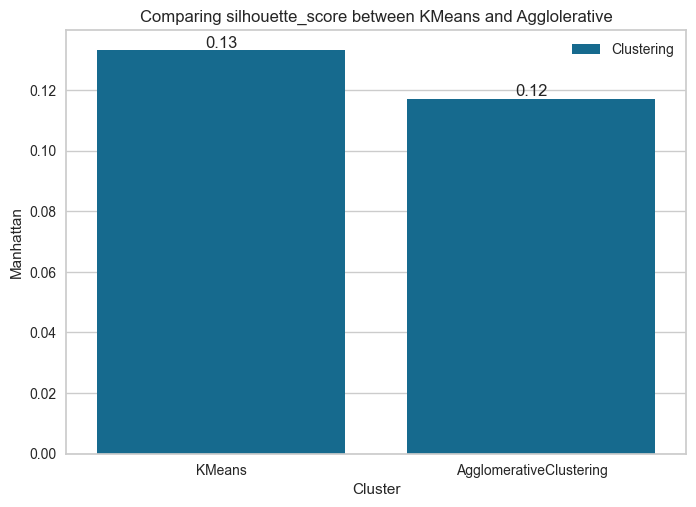

In [81]:
bar=sns.barplot(x="index",y="Manhattan",data=silhouette_score_df_manhattan_df,label="Clustering")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
    
plt.title("Comparing silhouette_score between KMeans and Agglolerative")
plt.xlabel("Cluster")
plt.show()